Human Physiology Report, BIOL 1310, Matt Rixman

# Resting Heart Rate is a Poor Indicator of Healthiness 

## Introduction

We call it "healthcare," but if you speak with somebody who works in that field, they'll tell you that it's mostly about sick people.
Let us call it "sickcare" instead.
Doing so will free up the word "healthcare" to refer to actions that take a healthy person and keep them healthy.

However much money insurance companies spend on sickcare, it's reasonable to assume that outcomes would improve if some of it were spent on healthcare instead.
We imagine a future where there's a healthcare industry that competes with the sickcare industry.
Creating such an industry will require that we re-evaluate our assumptions about what it means to be healthy.
We must ask:

> What does the sickcare industry know about health anyway?  Is it possible that their conclusions are faulty because they're drawn from data about sick people?

This study starts that journey by evaluating the following claim made by the course material for BIOL 1310:

> Resting heart BPM is an important factor to determine your overall health

Here we will assume that healthy people are generally more capable than unhealthy people, and will proceed with the following research question: Does having a low resting heart rate correlate with being generally more capable at things?  Specifically, we will compare it with:

- Reaction Time (lower is better)
- Vision Acuity (higher is better)
- Recovery Time (lower is better)

These were chosen because unlike other measured values (e.g. hand size) they're values with a healthy vs an unhealthy direction.

We hypothesize that health is not so easily summarized by a single number, and that any correlations found will be weak.

## Methods

**Resting Heart Rate** was measured by putting a doohicky on each participant's finger during a time when they had not been excercising and writing down a number which appeared on its display.

**Vision Acuity** was measured by standing a fixed distance from a poster and naming the letters shown on it to a partner.  The partner (standing nearer the poster) counted the number of letters that were correctly seen.

**Reaction Time** was measured by poking a web application in response to a changing color and then writing down a number which it displayed later on.

**Recovery Time** was measured by instructing participants to excercise at an intensity of their choosing for a brief time and then measuring how long it took for the doohicky to report that their heart rate had returned to its resting value.

This data was collected for ten students:

In [1]:
data = {
    "matt": [78, 274, 82, 119],
    "andy": [66, 299, 93, 150],
    "zach": [90, 271, 91, 240],
    "andrew": [54, 263, 72, 257],
    "meghan": [81, 297, 74, 200],
    "sarah": [89, 289, 67, 188],
    "elizabeth": [85, 464, 58, 84],
    "kai": [84, 365, 27, 40],
    "erica": [83, 328, 75, 528],
    "joshua": [83, 331, 51, 75]   
}
names = list(data.keys())

# experimental variable
experimental_variable = resting_heart_rate_bpm = [x[0] for x in data.values()]

# responding variables
reaction_time_msec = [x[1] for x in data.values()]
vision_accuity = [x[2] for x in data.values()]
recovery_time_sec = [x[3] for x in data.values()]

## Results

The following data was collected:

In [2]:
import pandas as pd
pd.DataFrame(data={
    "participant": names, 
    "resting heart rate (bpm)": resting_heart_rate_bpm, 
    "reaction time (msec)": reaction_time_msec, 
    "vision accuity (letters identified)": vision_accuity, 
    "recovery time (sec)": recovery_time_sec})

,participant,resting heart rate (bpm),reaction time (msec),vision accuity (letters identified),recovery time (sec)
0,matt,78,274,82,119
1,andy,66,299,93,150
2,zach,90,271,91,240
3,andrew,54,263,72,257
4,meghan,81,297,74,200
5,sarah,89,289,67,188
6,elizabeth,85,464,58,84
7,kai,84,365,27,40
8,erica,83,328,75,528
9,joshua,83,331,51,75


The following correlations were found:

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compare(responding_variable, respond_varname, respond_varunits):
    "Call this function to generate a plot"
    
    # plot the points
    x = list(map(float, experimental_variable))
    y = list(map(float, responding_variable))
    plt.scatter(x, y)
    
    # label each point
    for i, name in enumerate(names):
        plt.text(x[i] + 1, y[i] + 3, name)  #
    
    # calculate regression line
    slope, intercept, r_value, p_value, std_err = \
        linregress(x, y)
    
    # plot the regression line
    line_x = [min(x), max(x)]
    line_y = list(map(lambda x: slope * x + intercept, line_x))
    plt.plot(line_x, line_y)
    
    # label the plot
    plt.title(f"{respond_varname} vs Resting Heart Rate, r-squared = {r_value**2:.2f}")
    plt.xlabel("Resting Heart Rate (BPM)")
    plt.ylabel(f"{respond_varname} ({respond_varunits})")
    plt.margins(y=0.25)
    plt.show()

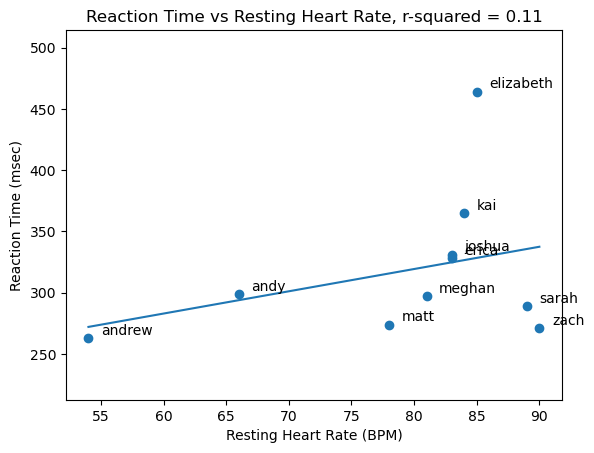

In [4]:
compare(reaction_time_msec, "Reaction Time", "msec")

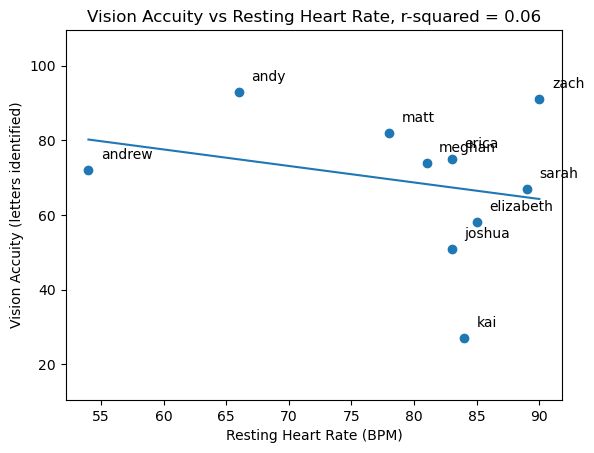

In [5]:
compare(vision_accuity, "Vision Accuity", "letters identified")

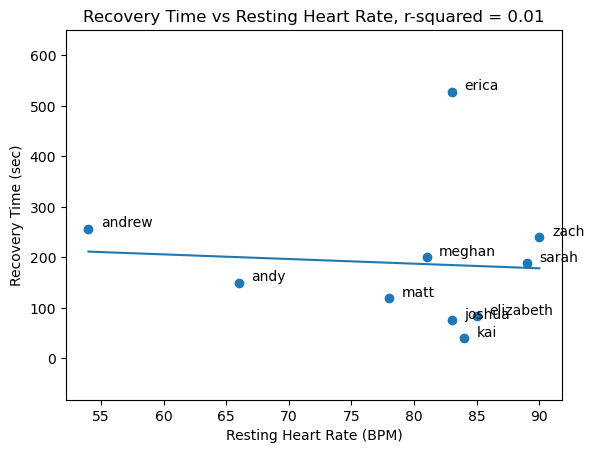

In [6]:
compare(recovery_time_sec, "Recovery Time", "sec")

In all three of the studied cases, the correlation is very weak.

The code for this analysis lives at [github.com/MatrixManAtYrService/BIOL1310humanphysiologyproject](github.com/MatrixManAtYrService/BIOL1310humanphysiologyproject)

## Conclusion

Generally speaking, correlations that are as weak as these can be ignored.
The only result here is "no correlation" in all three cases.

Ignoring this convention for a moment, it's suprising that reaction time is the only responding variable which correlates with resting heart rate in the expected direction.
That is, a low resting heart rate (presumably healthier) goes with a low reaction time (healthier).

In the case of visual accuity and recovery time, having a higher resting heart rate correlated with having a better outcome--which is the opposite of what one would expect, given the claim that resting heart rate determines overall health.

This data (or lack thereof) supports our hypothesis that resting heart rate is a poor indicator of overall health.

## Discussion

We have established only that a certain metric for health (presumably supported by data from the sickcare industry) is a poor one.
But assume that further research of this kind exposed the same kind of thing--that the sickcare industry is indeed confused about several important things relating to health.
Why might that be the case?

We would suggest that healthcare and sickcare differ fundamentally, and in a way that creates systemic biases--the debunked claim about heart rate being the result of such a bias.

In sickcare, the patient has arrived at the provider with a problem.
Both the patient and the provider want the problem to go away so they don't have to see each other anymore.
This creates a bias towards quick fixes and easy answers:
Low number = good, high number = bad.

In our vision of healthcare, by contrast, the patient shows up with goals and an expectation that upon reaching those goals, they will set new ones.
Its an arrangement that lacks the bias for misleading simplicity:
If you can't do ten pull-ups, there's no explaining it away with a doohicky and a conversation--it requires more long-term participation.

Future research of this type should probably find ways to control for participant enthusiasm when it comes to excercise.
The lowest correlation we found had to do with recovery rate, which is likely explained by certain participants running, and others walking.
Like "health", "recovery" requires more than a single number to summarize.
